<a href="https://colab.research.google.com/github/DeenoBajithaCode/LangGraph/blob/main/sequential_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installing LangGraph

This command installs the `langgraph` library, which allows us to build and simulate graph-based workflows in Python.


In [1]:
!pip install langgraph -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 9.1 MB/s eta 0:00:00


In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph
import string

# Step 1: Define State

In [3]:
class CleanState(TypedDict):
    original_text: str
    cleaned_text: str

# Step 2: Node 1 — Lowercase


In [4]:
def to_lowercase(state: CleanState) -> CleanState:
    lowered = state["original_text"].lower()
    return {**state, "cleaned_text": lowered}

# Step 3: Node 2 — Remove punctuation

In [5]:
def remove_punctuation(state: CleanState) -> CleanState:
    text = state["cleaned_text"]
    no_punct = text.translate(str.maketrans("", "", string.punctuation))
    return {**state, "cleaned_text": no_punct}


# Step 4: Node 3 — Remove extra spaces

In [6]:
def remove_extra_spaces(state: CleanState) -> CleanState:
    text = " ".join(state["cleaned_text"].split())
    return {**state, "cleaned_text": text}

# Step 5: Build the sequential graph



In [7]:
graph = StateGraph(CleanState)
graph.add_node("lowercase", to_lowercase)
graph.add_node("remove_punctuation", remove_punctuation)
graph.add_node("remove_extra_spaces", remove_extra_spaces)

#Step 6: Create Sequential flow and compile


In [8]:
graph.set_entry_point("lowercase")
graph.add_edge("lowercase", "remove_punctuation")
graph.add_edge("remove_punctuation", "remove_extra_spaces")
graph.set_finish_point("remove_extra_spaces")
app = graph.compile()

#Step 7: Visualize the graph

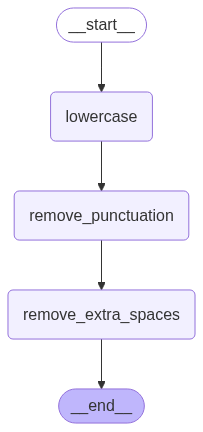

In [9]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

#Step 8: Run

In [10]:
input_state = {
    "original_text": "  Hello, World!  This is   LangGraph!!!  ",
    "cleaned_text": ""
}

result = app.invoke(input_state)

#Resulst

In [11]:
print("Cleaned Text:", result["cleaned_text"])

Cleaned Text: hello world this is langgraph
